In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("311_Service_Requests_from_2010_to_Present - 1.csv", low_memory=False)

In [3]:
data = data[['Complaint Type', 'City']]

In [4]:
data

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST
5,Illegal Parking,BROOKLYN
6,Illegal Parking,NEW YORK
7,Blocked Driveway,BRONX
8,Illegal Parking,KEW GARDENS
9,Blocked Driveway,BROOKLYN


In [5]:
data.count(axis=0)

Complaint Type    364558
City              361561
dtype: int64

In [6]:
data.City.describe()

count       361561
unique          53
top       BROOKLYN
freq        118862
Name: City, dtype: object

In [7]:
data.City.fillna('BROOKLYN', inplace=True)

In [8]:
data.head()

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST


In [9]:
data.describe()

,Complaint Type,City
count,364558,364558
unique,24,53
top,Blocked Driveway,BROOKLYN
freq,100881,121859


In [10]:
data_categorical_complaint = pd.Categorical(data['Complaint Type'])
data_categorical_city = pd.Categorical(data['City'])
data_complaint_category = pd.DataFrame(data_categorical_complaint.describe())

In [11]:
df_complaint_counts = pd.DataFrame(data_complaint_category.index)
df_complaint_counts.columns = ['Complaint Types']
df_complaint_counts['Counts'] = pd.Series([8,10541,1,478,100881,21661,315,1409,2,157,4879,172,
                                           92679,44109,1070,4109,51692,19352,327,681,4,5198,641,4192])
df_complaint_counts

,Complaint Types,Counts
0,Agency Issues,8
1,Animal Abuse,10541
2,Animal in a Park,1
3,Bike/Roller/Skate Chronic,478
4,Blocked Driveway,100881
5,Derelict Vehicle,21661
6,Disorderly Youth,315
7,Drinking,1409
8,Ferry Complaint,2
9,Graffiti,157


Q: Find the top 10 complaint types.

In [12]:
sorted_complaintcounts = df_complaint_counts.sort_values(['Counts'],ascending=False)
sorted_complaintcounts.head(10)

,Complaint Types,Counts
4,Blocked Driveway,100881
12,Illegal Parking,92679
16,Noise - Street/Sidewalk,51692
13,Noise - Commercial,44109
5,Derelict Vehicle,21661
17,Noise - Vehicle,19352
1,Animal Abuse,10541
21,Traffic,5198
10,Homeless Encampment,4879
23,Vending,4192


Q: Plot a bar graph of count vs. complaint types.


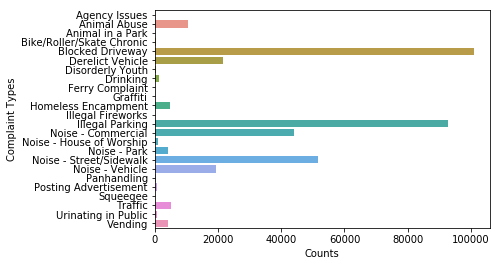

In [13]:
sns.barplot(x = 'Counts', y = 'Complaint Types', data = df_complaint_counts)
sns.axisgrid
sns.set_context('notebook')

In [14]:
#Making a separate Data Frame for City
data_city_categorical = pd.DataFrame(data_categorical_city.describe())
df_city_counts = pd.DataFrame(data_city_categorical.index)
df_city_counts.columns = ['City']
df_city_counts['Counts'] = pd.Series([259,7991,906,1550,487,31,49171,121859,617,110,1544,5383,3558,3438,30,1397,196,7487,2122,2453,361,1231,1144,1,2106,8932,1008,712,3028,
                                      170,3118,2291,129,77312,717,3446,37,2251,1807,2335,6392,831,1091,1047,2668,3431,1094,15340,944,1369,3103,4357,166])
df_city_counts

,City,Counts
0,ARVERNE,259
1,ASTORIA,7991
2,Astoria,906
3,BAYSIDE,1550
4,BELLEROSE,487
5,BREEZY POINT,31
6,BRONX,49171
7,BROOKLYN,121859
8,CAMBRIA HEIGHTS,617
9,CENTRAL PARK,110


In [15]:
#Top 10 Cities with the highest counts of service requests
top10NYCrequest_city = df_city_counts.sort_values(['Counts'],ascending=False).head(10)
top10NYCrequest_city

,City,Counts
7,BROOKLYN,121859
33,NEW YORK,77312
6,BRONX,49171
47,STATEN ISLAND,15340
25,JAMAICA,8932
1,ASTORIA,7991
17,FLUSHING,7487
40,RIDGEWOOD,6392
11,CORONA,5383
51,WOODSIDE,4357


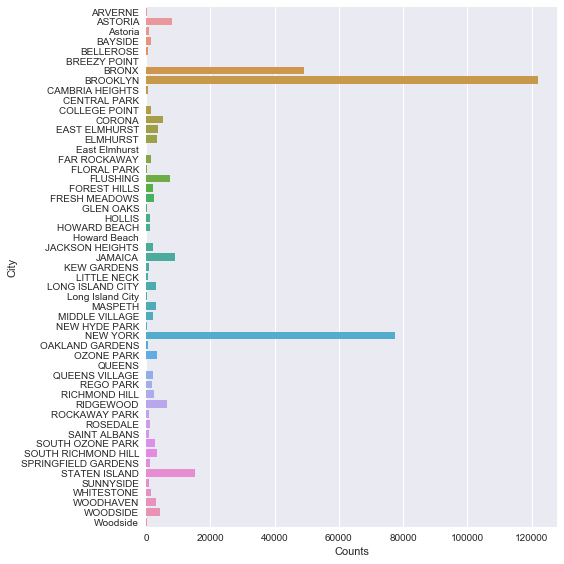

In [18]:
sns.factorplot(x='Counts', y = 'City', data=df_city_counts, size=8,aspect=1, kind='bar', legend = True)
sns.set_style('whitegrid')

Q: Display the Complaint Type and City together.

In [17]:
df_complaint_city = data[['Complaint Type', 'City']]
df_complaint_city

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST
5,Illegal Parking,BROOKLYN
6,Illegal Parking,NEW YORK
7,Blocked Driveway,BRONX
8,Illegal Parking,KEW GARDENS
9,Blocked Driveway,BROOKLYN
